## Initialise Libraries and Data

In [4]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [25]:
data = pd.read_csv('anime_cleaned.csv')
numeric_data = pd.DataFrame(data[["score", "scored_by_users", "episodes", "year aired", "duration", "popularity"]])
data.head()

,rank,title,score,scored_by_users,type,episodes,status,year aired,premiered,broadcast,...,studios,source,genres,main genre,theme,demographic,duration,rating,popularity,url
0,1,Fullmetal Alchemist: Brotherhood,9.15,1704441,TV,64.0,Finished Airing,2009,Spring,Sundays,...,Bones,Manga,"Action, Adventure, Comedy, Drama, Fantasy",Action,Military,Shounen,24,R - 17+ (violence & profanity),3,https://myanimelist.net/anime/5114/Fullmetal_A...
1,2,Shingeki no Kyojin: The Final Season Part 2,9.12,188373,TV,12.0,Currently Airing,2022,Winter,Mondays,...,MAPPA,Manga,"Action, Drama, Fantasy, Mystery",Action,Unknown,Shounen,23,R - 17+ (violence & profanity),198,https://myanimelist.net/anime/48583/Shingeki_n...
2,3,Steins;Gate,9.09,1161139,TV,24.0,Finished Airing,2011,Spring,Wednesdays,...,White Fox,Visual novel,"Drama, Sci-Fi, Suspense",Drama,Psychological,All,24,PG-13 - Teens 13 or older,13,https://myanimelist.net/anime/9253/Steins_Gate
3,4,Gintama°,9.09,182120,TV,51.0,Finished Airing,2015,Spring,Wednesdays,...,Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi",Action,Unknown,Shounen,24,PG-13 - Teens 13 or older,334,https://myanimelist.net/anime/28977/Gintama°
4,5,Shingeki no Kyojin Season 3 Part 2,9.08,1195629,TV,10.0,Finished Airing,2019,Spring,Mondays,...,Wit Studio,Manga,"Action, Drama, Fantasy, Mystery",Action,Unknown,Shounen,23,R - 17+ (violence & profanity),32,https://myanimelist.net/anime/38524/Shingeki_n...


## Basic Analysis

### Check number of entries

In [17]:
data.shape #gets total column/rows

(3958, 22)

### Check all predictors and dtype

In [18]:
data.info() #info on all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3958 entries, 0 to 3957
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             3958 non-null   int64  
 1   title            3958 non-null   object 
 2   score            3958 non-null   float64
 3   scored_by_users  3958 non-null   int64  
 4   type             3958 non-null   object 
 5   episodes         3942 non-null   float64
 6   status           3958 non-null   object 
 7   year aired       3958 non-null   int64  
 8   premiered        3958 non-null   object 
 9   broadcast        3958 non-null   object 
 10  producers        3958 non-null   object 
 11  licensors        3958 non-null   object 
 12  studios          3958 non-null   object 
 13  source           3958 non-null   object 
 14  genres           3284 non-null   object 
 15  main genre       3958 non-null   object 
 16  theme            3958 non-null   object 
 17  demographic   

### Check Numeric Data Type Quick Summary

In [19]:
data.describe().round(3) #mean/median/count/etc for all numeric data types

,rank,score,scored_by_users,episodes,year aired,duration,popularity
count,3958.000,3958.000,3958.000,3942.000,3958.000,3958.000,3958.00
mean,3828.354,7.072,74021.605,28.156,2008.443,21.031,4316.03
std,2360.862,0.618,178364.083,50.283,11.726,6.732,3632.67
min,1.000,6.100,0.000,2.000,1963.000,0.000,1.00
25%,1774.500,6.570,1696.500,12.000,2004.000,23.000,1258.25
50%,3725.500,7.020,12042.000,13.000,2012.000,24.000,3221.50
75%,5842.500,7.460,60988.250,26.000,2017.000,24.000,6932.75
max,8198.000,9.150,2319502.000,1787.000,2022.000,69.000,15702.00


### Check Categorical Data Type Quick Summary

In [20]:
data.describe(exclude=[np.number])

,title,type,status,premiered,broadcast,producers,licensors,studios,source,genres,main genre,theme,demographic,rating,url
count,3958,3958,3958,3958,3958,3958,3958,3958,3958,3284,3958,3958,3958,3958,3958
unique,3954,2,2,5,9,2141,160,556,18,569,17,18,6,6,3954
top,Wu Geng Ji,TV,Finished Airing,Spring,Unknown,"None found, add some","None found, add some","None found, add some",Manga,"Comedy, Slice of Life",Action,Unknown,All,PG-13 - Teens 13 or older,https://myanimelist.net/anime/33758/Wu_Geng_Ji
freq,2,3421,3881,1095,1723,728,1869,220,1437,224,1322,2371,2344,2408,2


## All Display Functions

In [22]:
#get count of all different unique values in one column
def getCountOfColumn(columnname):
    print("Number of " +columnname + ":", len(data[columnname].unique()))

    print(data[columnname].value_counts())
    sb.catplot(y = columnname, data = data, kind = "count", height = 4)

#compare two colums with heatmap
def compareTwoColumnsHeatMap(column1, column2):
    f = plt.figure(figsize=(20, 20))
    sb.heatmap(data.groupby([column1, column2]).size().unstack(), 
               linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn", fmt='g')
    
#get graph for numeric data    
def getNumericGraphs():
    f, axes = plt.subplots(6, 3, figsize=(18, 24))

    count = 0
    for var in numeric_data:
        sb.boxplot(data = data[var], orient = "h", ax = axes[count,0])
        sb.histplot(data = data[var], ax = axes[count,1])
        sb.violinplot(data = data[var], orient = "h", ax = axes[count,2])
        count += 1
        
def getCorrMatrix():
    # Correlation Matrix
    print(numeric_data.corr())

    # Heatmap of the Correlation Matrix
    f = plt.figure(figsize=(20, 20))
    sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
               annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

## Numerical Predictors Analysis

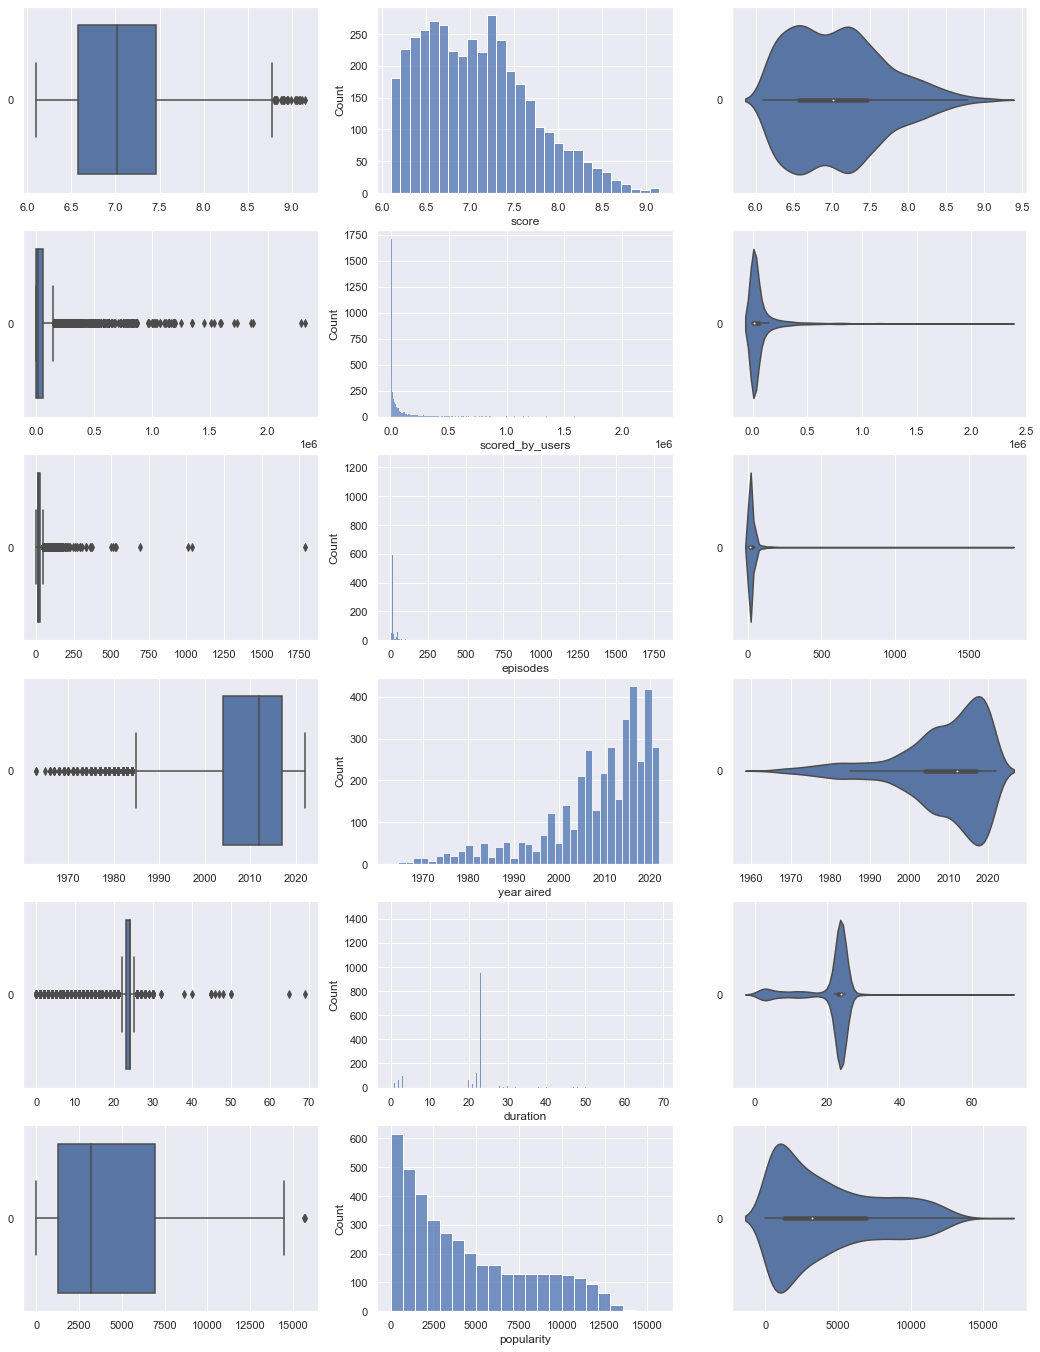

In [38]:
getNumericGraphs()

                    score  scored_by_users  episodes  year aired  duration  \
score            1.000000         0.440870  0.028308    0.163512  0.222995   
scored_by_users  0.440870         1.000000  0.020218    0.158500  0.138948   
episodes         0.028308         0.020218  1.000000   -0.271113  0.007077   
year aired       0.163512         0.158500 -0.271113    1.000000 -0.245381   
duration         0.222995         0.138948  0.007077   -0.245381  1.000000   
popularity      -0.553283        -0.428786  0.127964   -0.377362 -0.241414   

                 popularity  
score             -0.553283  
scored_by_users   -0.428786  
episodes           0.127964  
year aired        -0.377362  
duration          -0.241414  
popularity         1.000000  


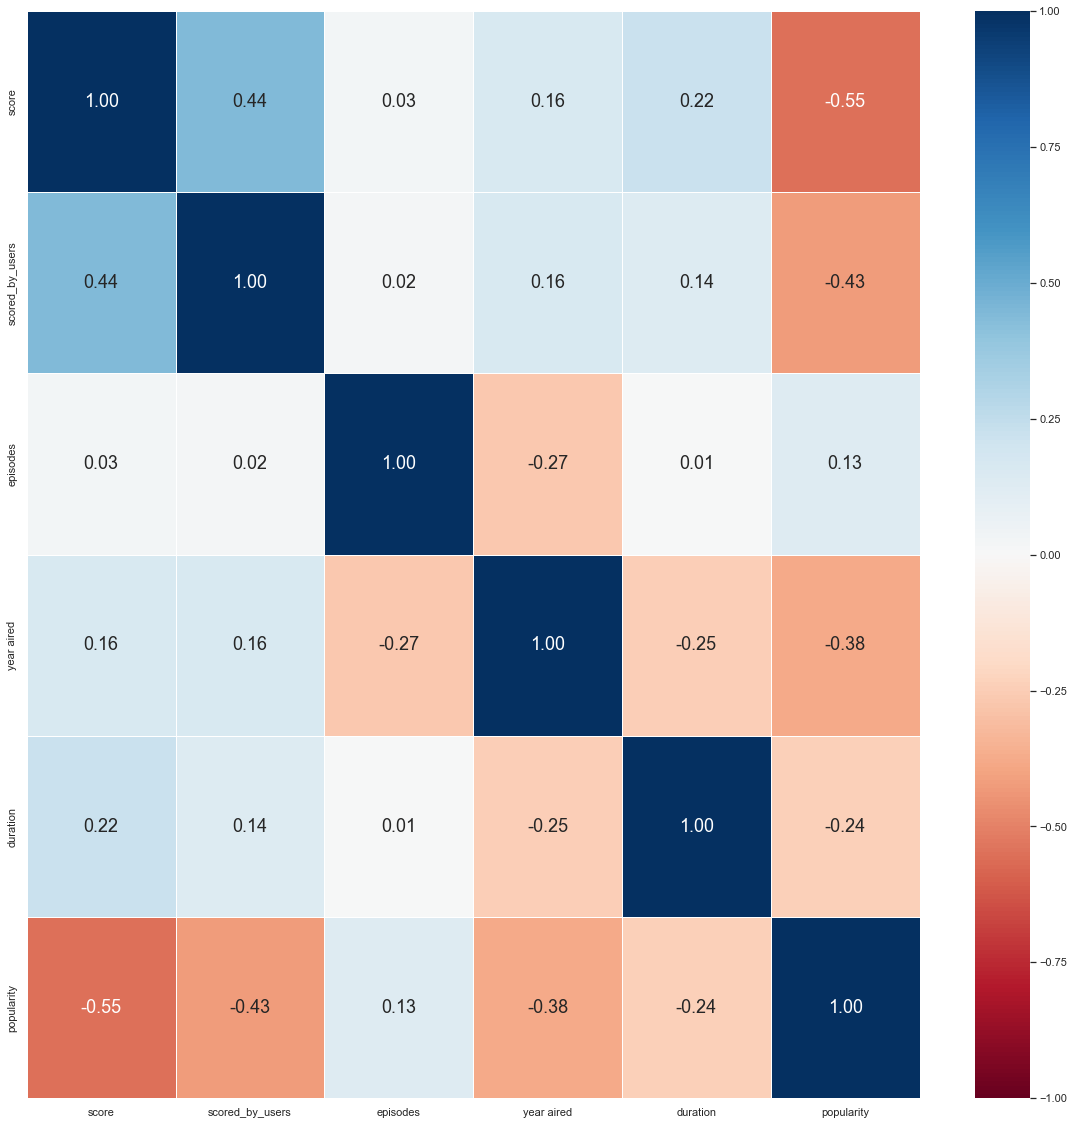

In [36]:
getCorrMatrix()

### Based on Correlation and the Graphs, Episode is the worst predictor due to the significant amount of outliers skewing the relationship with score, Best Predictor is Popularity with a -0.55 relationship with score

## Categorical Predictors Analysis

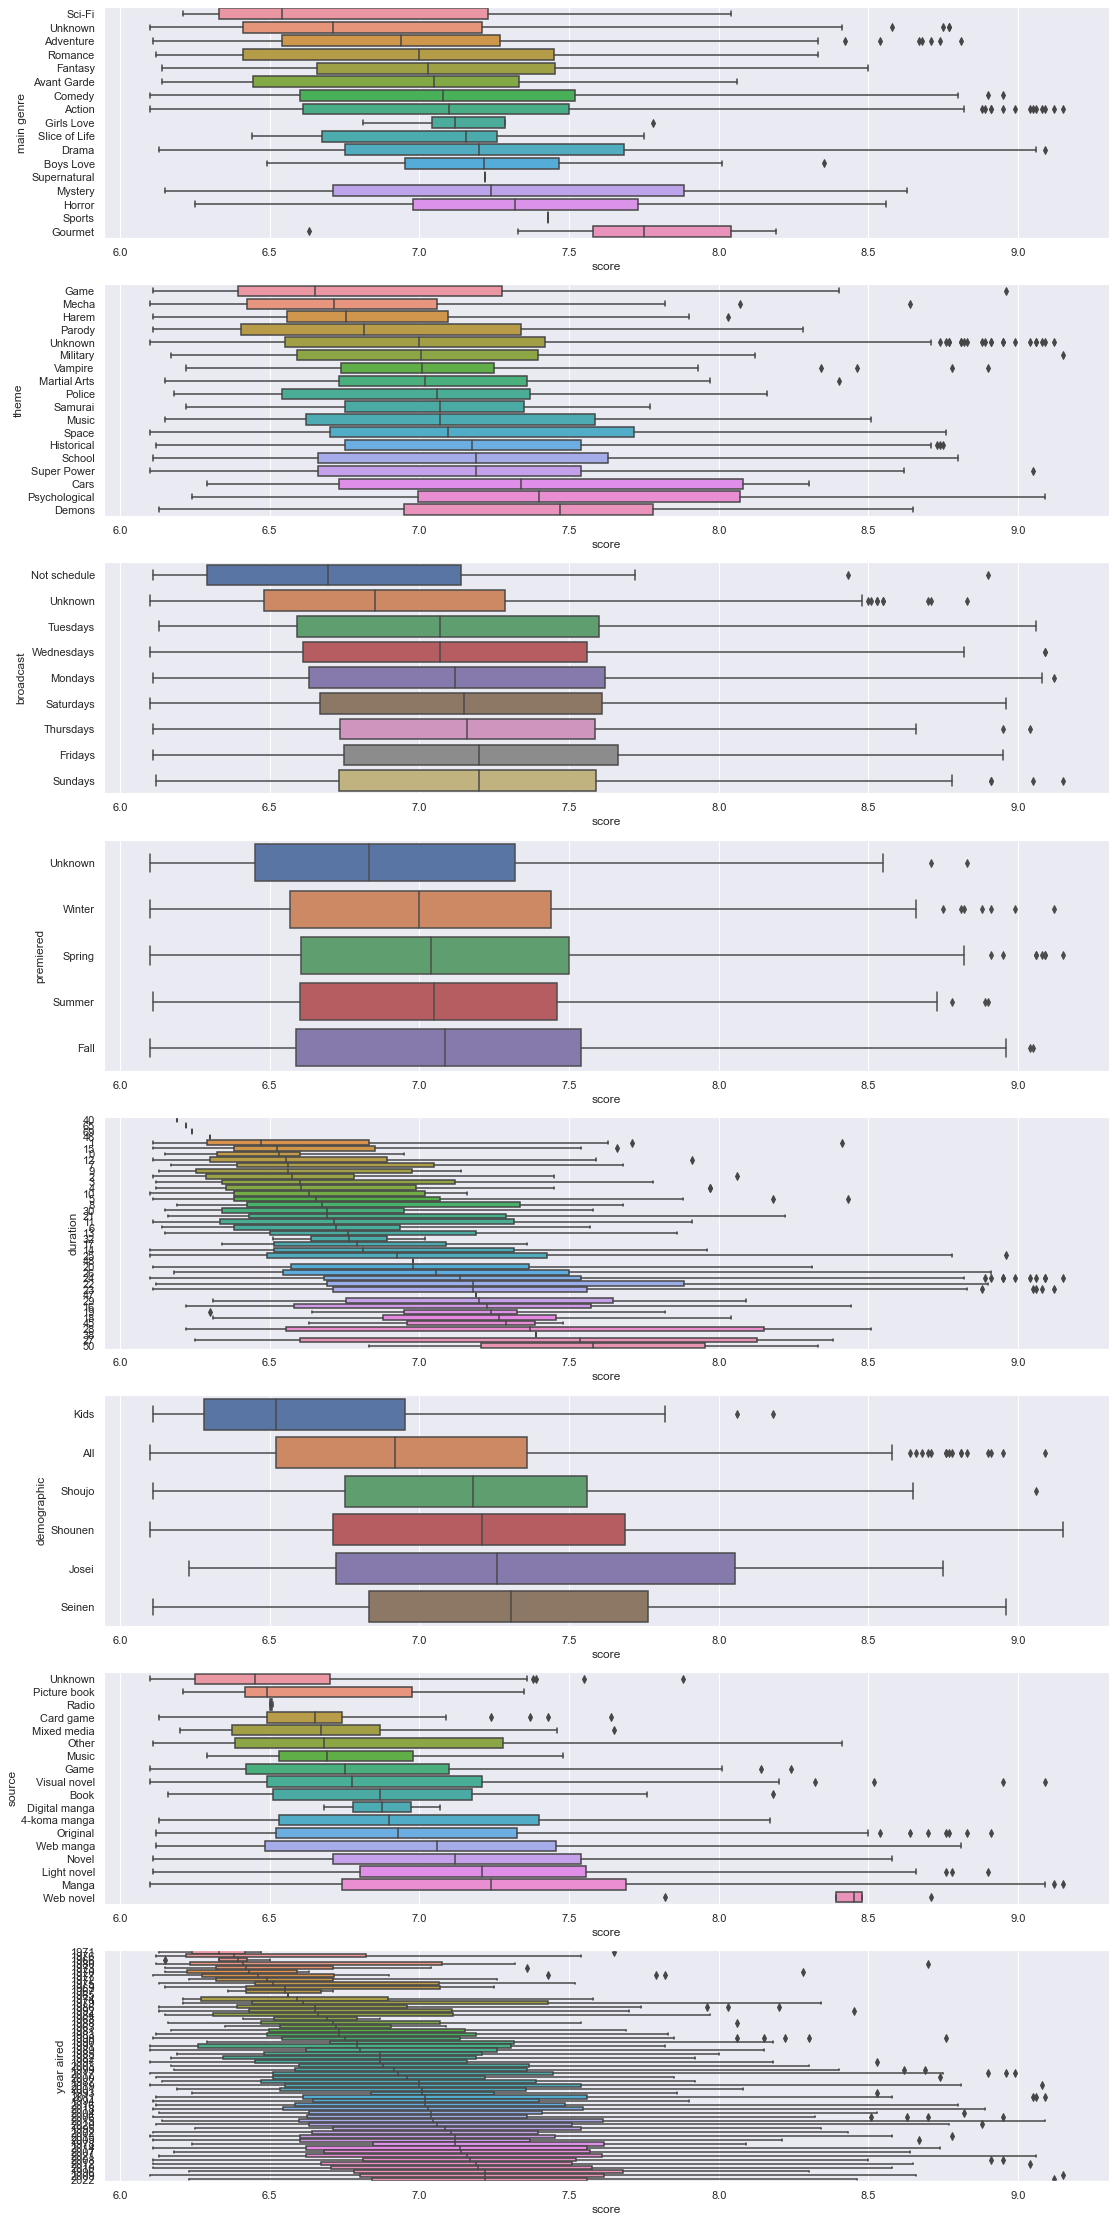

In [57]:
f, axes = plt.subplots(8,1,figsize=(18,40))    
cat_data = pd.DataFrame(data[['main genre', 'theme', 'broadcast', 'premiered', 'duration', 'demographic', 'source', 'year aired', 'score']])
cat_var_data = pd.DataFrame(data[['main genre', 'theme', 'broadcast', 'premiered', 'duration', 'demographic', 'source', 'year aired']])

count = 0
for var in cat_var_data:
    sb.boxplot(data = cat_data, y=var, x='score', orient = 'h', ax=axes[count]
               , order = cat_data.groupby(var)['score'].median().sort_values().index)
    count+=1

### Get count of all categorical predictors and see if balanced

Number of main genre: 17
Action           1322
Comedy           1005
Unknown           674
Adventure         467
Drama             287
Fantasy            48
Mystery            35
Boys Love          28
Horror             23
Romance            19
Avant Garde        12
Slice of Life      12
Sci-Fi             11
Gourmet             9
Girls Love          4
Sports              1
Supernatural        1
Name: main genre, dtype: int64
Number of theme: 18
Unknown          2371
School            433
Mecha             178
Historical        174
Music              99
Super Power        97
Demons             97
Game               94
Psychological      84
Harem              58
Parody             56
Martial Arts       54
Military           48
Space              36
Police             29
Vampire            28
Cars               17
Samurai             5
Name: theme, dtype: int64
Number of broadcast: 9
Unknown         1723
Sundays          459
Saturdays        396
Fridays          384
Tuesdays         277


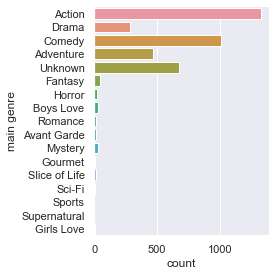

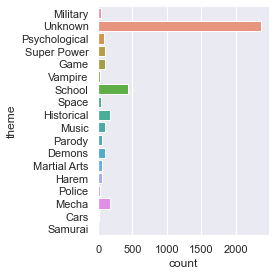

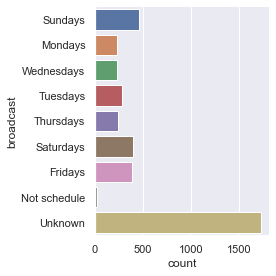

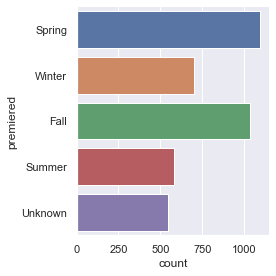

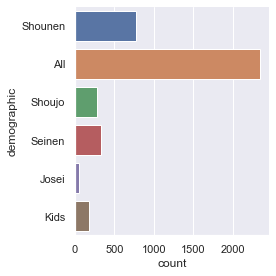

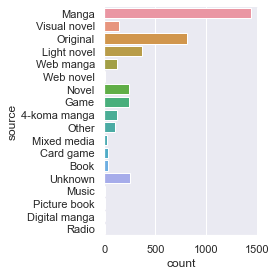

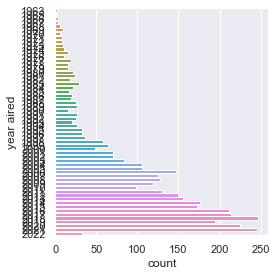

In [34]:
#getCountOfColumn("main genre")
#sb.stripplot(x = 'main genre', y = 'score', data = data)

cat_data = pd.DataFrame(data[['main genre', 'theme', 'broadcast', 'premiered', 'demographic', 'source', 'year aired', 'score']])
cat_var_data = pd.DataFrame(data[['main genre', 'theme', 'broadcast', 'premiered', 'demographic', 'source', 'year aired']])

count = 0
for var in cat_var_data:
    getCountOfColumn(var)
    count+=1

### Categorical Predictors count are not very balanced, a few category will stand out more than the others by having a lot more rows than the others (e.g, source or demographic, year aired)

### Comparing Categorical Predictors with score using other plots to get more insights

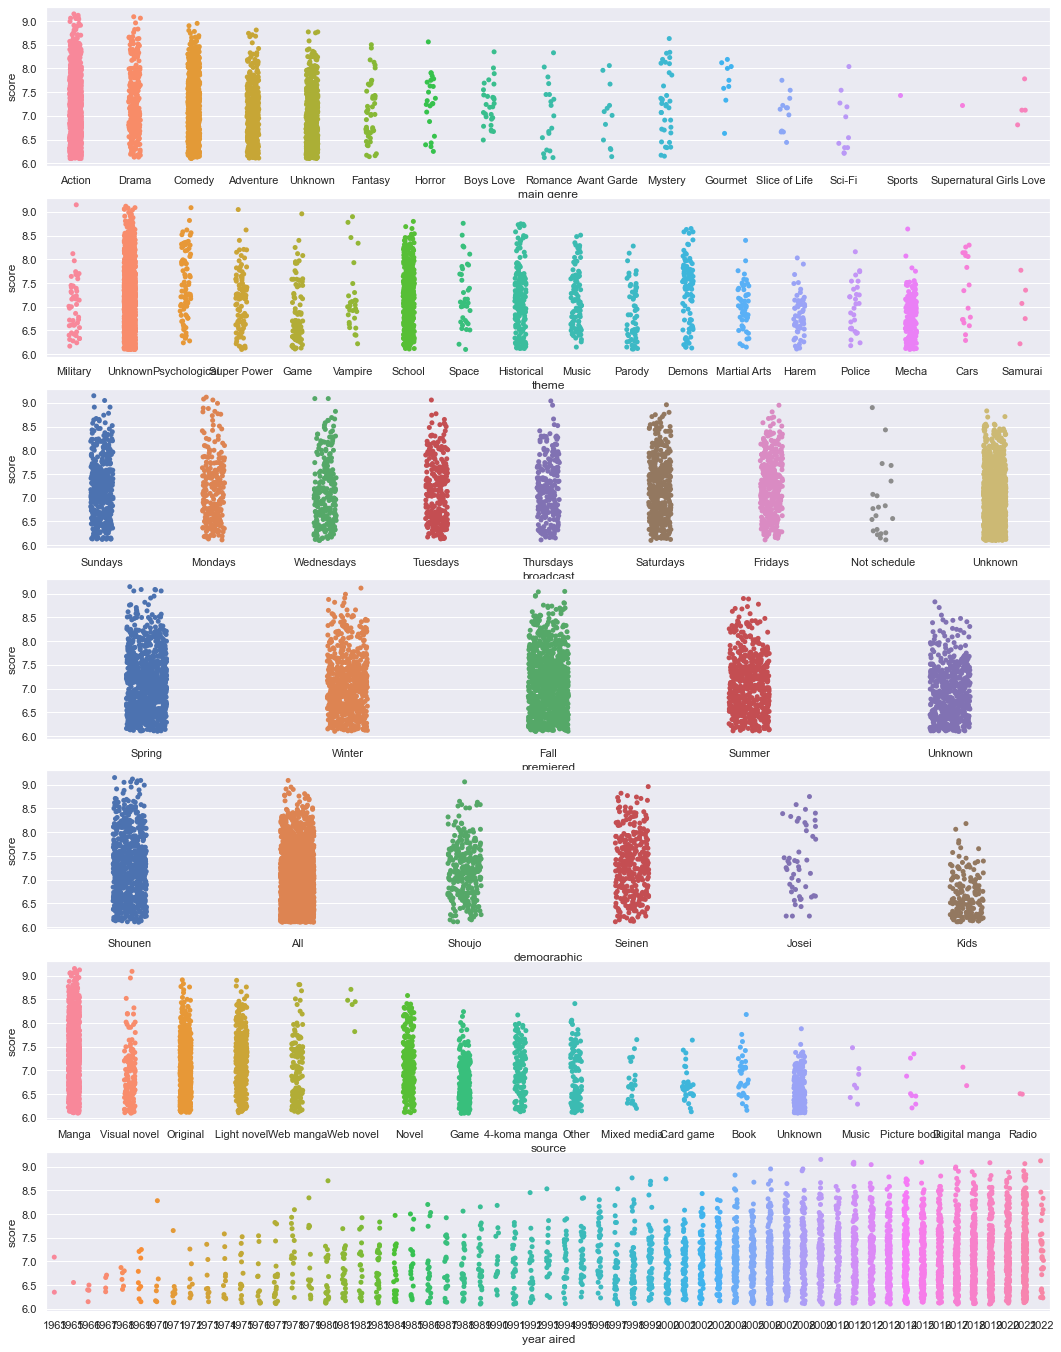

In [54]:
f, axes = plt.subplots(7, 1, figsize=(18, 24))

count = 0
for var in cat_var_data:
    sb.stripplot(x = var, y = 'score', data = data, ax=axes[count])
    count += 1


### Slight Positive relationship with score for some predictors (e.g year aired, demographic) but most predictors don't have a strong relationship with score because no increasing trend (e.g, main genre, broadcast)

### Compare two categorical predictor with each other

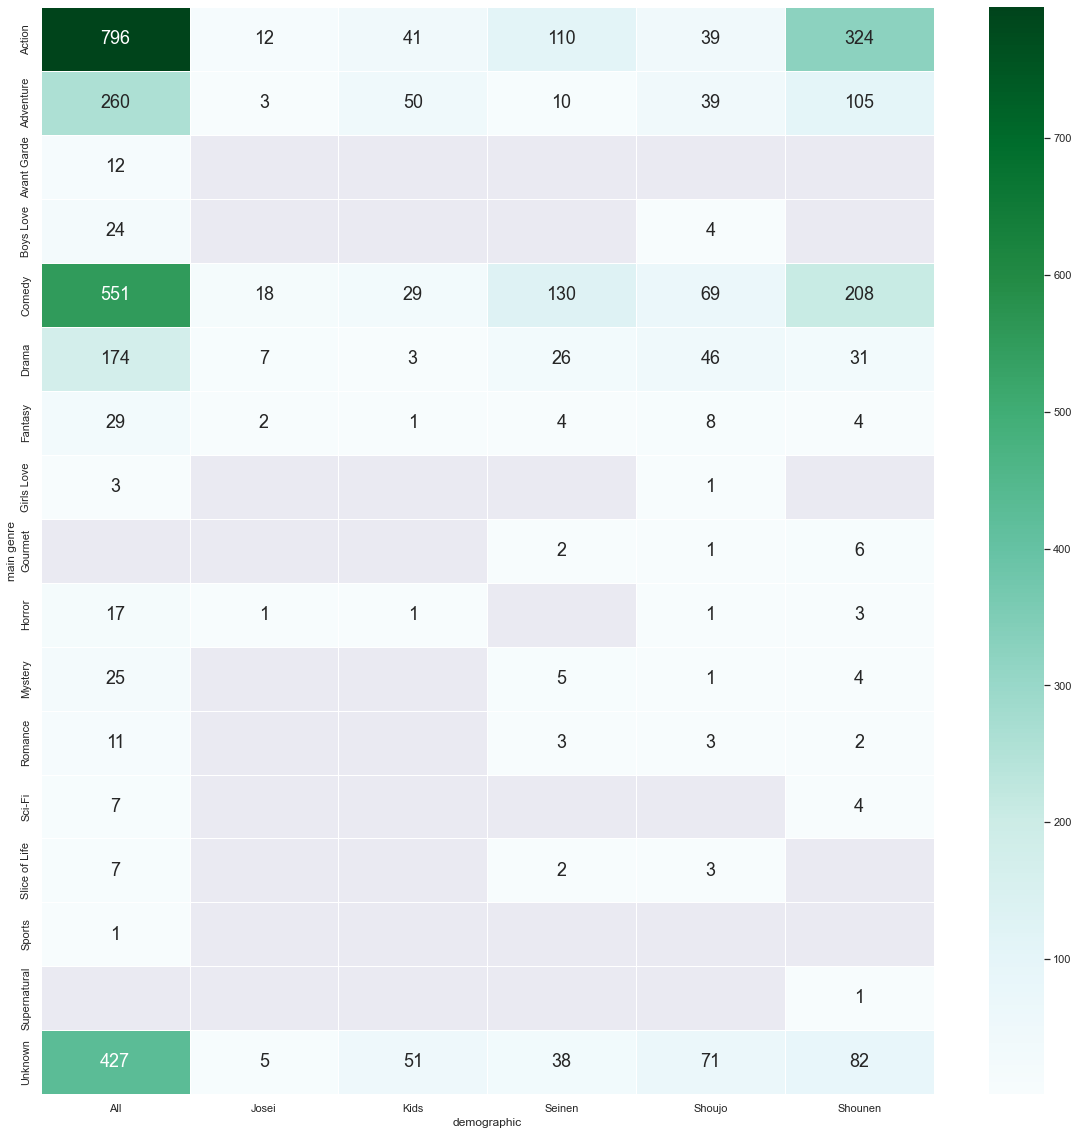

In [55]:
compareTwoColumnsHeatMap("main genre", "demographic")

### Top 10 Animes by Score

In [56]:
data.sort_values('score', ascending=False).head(10).iloc[:,3:]

,scored_by_users,type,episodes,status,year aired,premiered,broadcast,producers,licensors,studios,source,genres,main genre,theme,demographic,duration,rating,popularity,url
0,1704441,TV,64.0,Finished Airing,2009,Spring,Sundays,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"Action, Adventure, Comedy, Drama, Fantasy",Action,Military,Shounen,24,R - 17+ (violence & profanity),3,https://myanimelist.net/anime/5114/Fullmetal_A...
1,188373,TV,12.0,Currently Airing,2022,Winter,Mondays,"Production I.G, Dentsu, Mainichi Broadcasting ...","None found, add some",MAPPA,Manga,"Action, Drama, Fantasy, Mystery",Action,Unknown,Shounen,23,R - 17+ (violence & profanity),198,https://myanimelist.net/anime/48583/Shingeki_n...
2,1161139,TV,24.0,Finished Airing,2011,Spring,Wednesdays,"Frontier Works, Media Factory, Movic, AT-X, Ka...",Funimation,White Fox,Visual novel,"Drama, Sci-Fi, Suspense",Drama,Psychological,All,24,PG-13 - Teens 13 or older,13,https://myanimelist.net/anime/9253/Steins_Gate
3,182120,TV,51.0,Finished Airing,2015,Spring,Wednesdays,"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi",Action,Unknown,Shounen,24,PG-13 - Teens 13 or older,334,https://myanimelist.net/anime/28977/Gintama°
4,1195629,TV,10.0,Finished Airing,2019,Spring,Mondays,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"Action, Drama, Fantasy, Mystery",Action,Unknown,Shounen,23,R - 17+ (violence & profanity),32,https://myanimelist.net/anime/38524/Shingeki_n...
5,128247,TV,13.0,Finished Airing,2021,Spring,Tuesdays,"TV Tokyo, TV Osaka, Nihon Ad Systems, Hakusens...",Funimation,TMS Entertainment,Manga,"Drama, Romance, Slice of Life, Supernatural",Drama,Unknown,Shoujo,23,PG-13 - Teens 13 or older,629,https://myanimelist.net/anime/42938/Fruits_Bas...
6,188495,TV,51.0,Finished Airing,2011,Spring,Mondays,"TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...","None found, add some",Sunrise,Manga,"Action, Comedy, Sci-Fi",Action,Unknown,Shounen,24,PG-13 - Teens 13 or older,379,https://myanimelist.net/anime/9969/Gintama
7,1343292,TV,148.0,Finished Airing,2011,Fall,Sundays,"VAP, Nippon Television Network, Shueisha",VIZ Media,Madhouse,Manga,"Action, Adventure, Fantasy",Action,Super Power,Shounen,23,PG-13 - Teens 13 or older,9,https://myanimelist.net/anime/11061/Hunter_x_H...
8,137219,TV,13.0,Finished Airing,2012,Fall,Thursdays,"TV Tokyo, Aniplex, Dentsu, Shueisha, Miracle Bus","None found, add some",Sunrise,Manga,"Action, Comedy, Sci-Fi",Action,Unknown,Shounen,24,PG-13 - Teens 13 or older,684,https://myanimelist.net/anime/15417/Gintama__E...
9,115784,TV,12.0,Finished Airing,2017,Winter,Mondays,"TV Tokyo, Aniplex, Dentsu, Shueisha","None found, add some",Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi",Action,Unknown,Shounen,24,PG-13 - Teens 13 or older,731,https://myanimelist.net/anime/34096/Gintama


### Top 10 Worst Anime by Score

In [53]:
data.sort_values('score', ascending=True).head(10).iloc[:,3:]

,scored_by_users,type,episodes,status,year aired,premiered,broadcast,producers,licensors,studios,source,genres,main genre,theme,demographic,duration,rating,popularity,url
3887,319,TV,23.0,Finished Airing,1997,Fall,Saturdays,Konami,ADV Films,Trans Arts,Game,NaN,Unknown,Unknown,Shounen,24,G - All Ages,10654,https://myanimelist.net/anime/2885/Ganbare_Goemon
3886,817,ONA,26.0,Finished Airing,2019,Unknown,Unknown,Magic Capsule,"None found, add some","Sunrise, Bandai Namco Pictures, XFLAG",Game,"Action, Sci-Fi",Action,Mecha,All,10,PG-13 - Teens 13 or older,8042,https://myanimelist.net/anime/38719/Fight_Leag...
3885,417,TV,56.0,Finished Airing,1989,Winter,Unknown,Kyoto Animation,"None found, add some","Production I.G, Shin-Ei Animation",Manga,NaN,Unknown,Unknown,All,25,G - All Ages,11057,https://myanimelist.net/anime/5908/Chinpui
3884,33517,TV,12.0,Finished Airing,2013,Fall,Wednesdays,"Lantis, Studio Mausu",Funimation,"Hoods Entertainment, teamKG",Game,"Action, Fantasy",Action,Unknown,All,24,R - 17+ (violence & profanity),1899,https://myanimelist.net/anime/18767/BlazBlue__...
3883,167,ONA,20.0,Finished Airing,2017,Unknown,Unknown,"Tohokushinsha Film Corporation, Tencent Animat...","None found, add some","Success Corp., Dangun Pictures",Game,"Action, Adventure, Fantasy",Action,Unknown,All,14,PG-13 - Teens 13 or older,10149,https://myanimelist.net/anime/38413/Arad__Sumi...
3882,208,TV,39.0,Finished Airing,1991,Spring,Unknown,"None found, add some","None found, add some",Shin-Ei Animation,Unknown,"Comedy, Sci-Fi",Comedy,Space,All,25,G - All Ages,11885,https://myanimelist.net/anime/5628/21_Emon
3881,116354,TV,12.0,Finished Airing,2009,Fall,Wednesdays,"Marvelous, Pony Canyon, feng",Sentai Filmworks,Doga Kobo,Visual novel,"Action, Supernatural, Ecchi",Action,Super Power,All,25,R - 17+ (violence & profanity),845,https://myanimelist.net/anime/6682/11eyes
3864,270,TV,26.0,Finished Airing,2006,Spring,Unknown,"None found, add some","None found, add some",Xebec,Game,"Adventure, Comedy, Fantasy, Romance",Adventure,Unknown,All,15,PG - Children,11089,https://myanimelist.net/anime/1872/Saru_Getchu...
3865,187,TV,26.0,Finished Airing,1998,Spring,Unknown,"None found, add some","None found, add some","None found, add some",Unknown,"Action, Sports",Action,Unknown,Shounen,24,None,12764,https://myanimelist.net/anime/9424/Seupideuwan...
3866,42937,TV,12.0,Finished Airing,2018,Summer,Fridays,"TBS, SUPA LOVE",Sentai Filmworks,Lerche,Light novel,"Action, Fantasy, Sci-Fi",Action,Game,All,24,PG-13 - Teens 13 or older,1469,https://myanimelist.net/anime/36316/Shichisei_...
